# Diabetes Prediction

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# importing our metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


## Data Collection and Preprocessing

In [2]:
# Loading our data
diabetes = pd.read_csv("diabetes.csv")

In [3]:
# checking the first few rows of our dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
# checking the columns
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# converting the column names to lower case for easy coding
diabetes.columns = diabetes.columns.str.lower()

In [7]:
# checking for null values
diabetes.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [8]:
# checking for duplicates
diabetes.duplicated().sum()

0

In [9]:
# getting summary statistics of the data
diabetes.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The following columns - glucose, bloodpressure, skinthickness, insulin and bmi, have a minimum value of zero, which is illogical and therefore indicates missing values. 
Therefore we will be replacing them with appropriate values such as the mean and median to ensure a complete datset.

In [10]:
# replacing the zeros in those cloumns with nan and the suitable values
diabetes[['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']] = diabetes[
    ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']].replace(0,np.nan)

print(diabetes.isna().sum())

pregnancies                   0
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                       0
dtype: int64


In [11]:
# filling the missing values with the appropriate values

diabetes['glucose'].fillna(diabetes.glucose.mean(), inplace = True)
diabetes['bloodpressure'].fillna(diabetes.bloodpressure.median(), inplace = True)
diabetes['skinthickness'].fillna(diabetes.skinthickness.mean(), inplace = True)
diabetes['insulin'].fillna(diabetes.insulin.median(), inplace = True)
diabetes['bmi'].fillna(diabetes.bmi.median(), inplace = True)

## Exploratory Data Analysis

In [12]:
# value counts of the target variable
diabetes['outcome'].value_counts()

outcome
0    500
1    268
Name: count, dtype: int64

the dataset is imbalanced as it is biased towards those not having diabetes

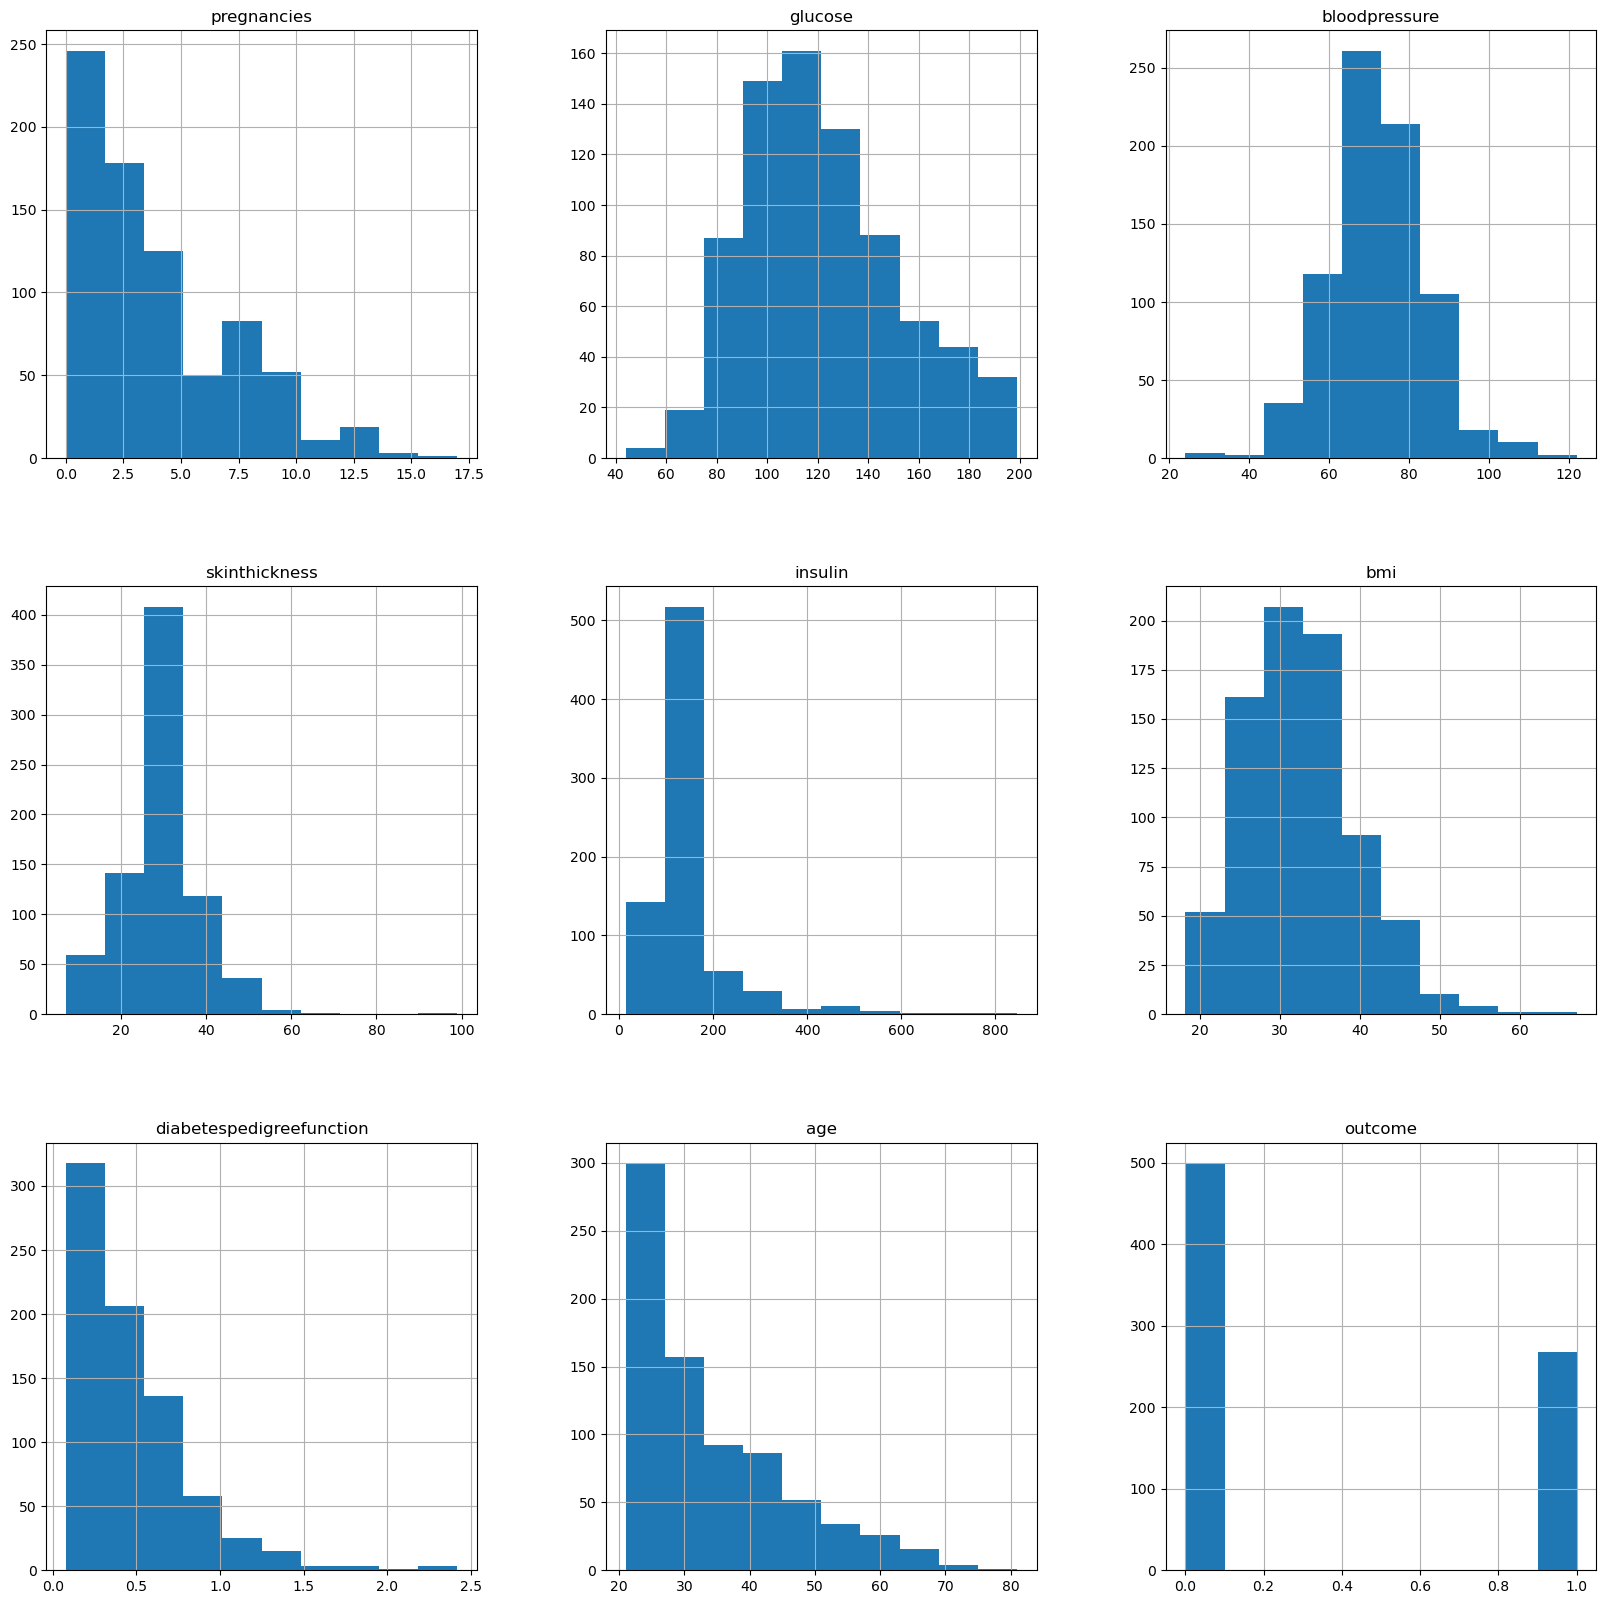

In [13]:
# Distribution of various features in the dataset
p= diabetes.hist(figsize = (20,20))

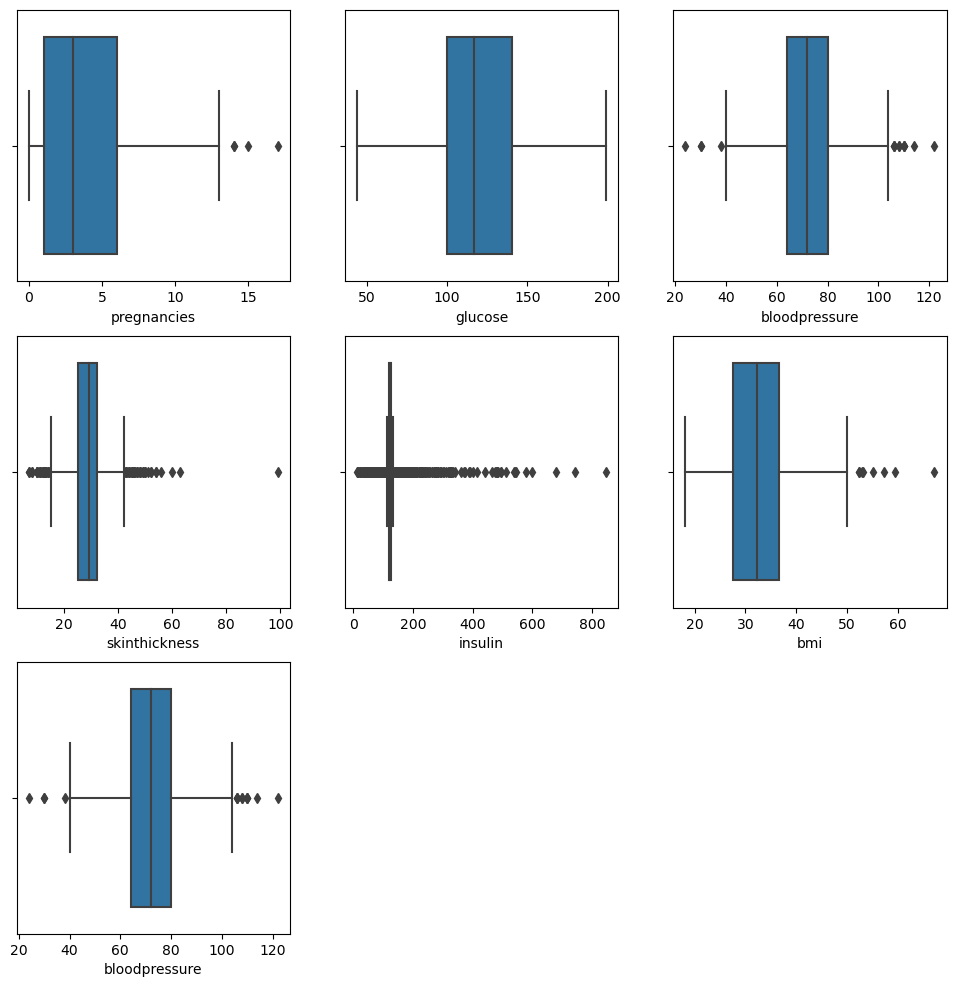

In [14]:
# plotting a boxplot to detect outliers within the columns
plt.figure(figsize=(12,12))
for i,col in enumerate(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'bloodpressure']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = diabetes)
plt.show()

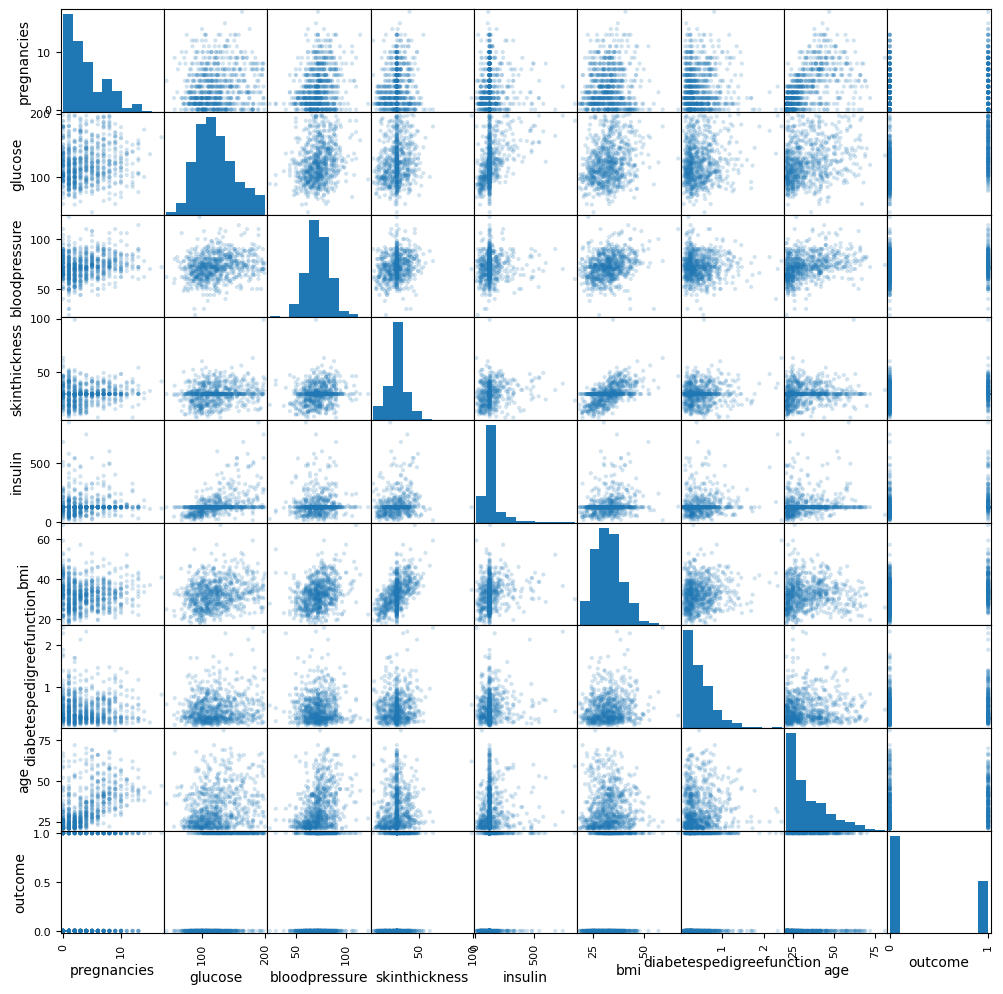

In [15]:
p = pd.plotting.scatter_matrix(
    diabetes,
     figsize=(12, 12), alpha=0.2
    )

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


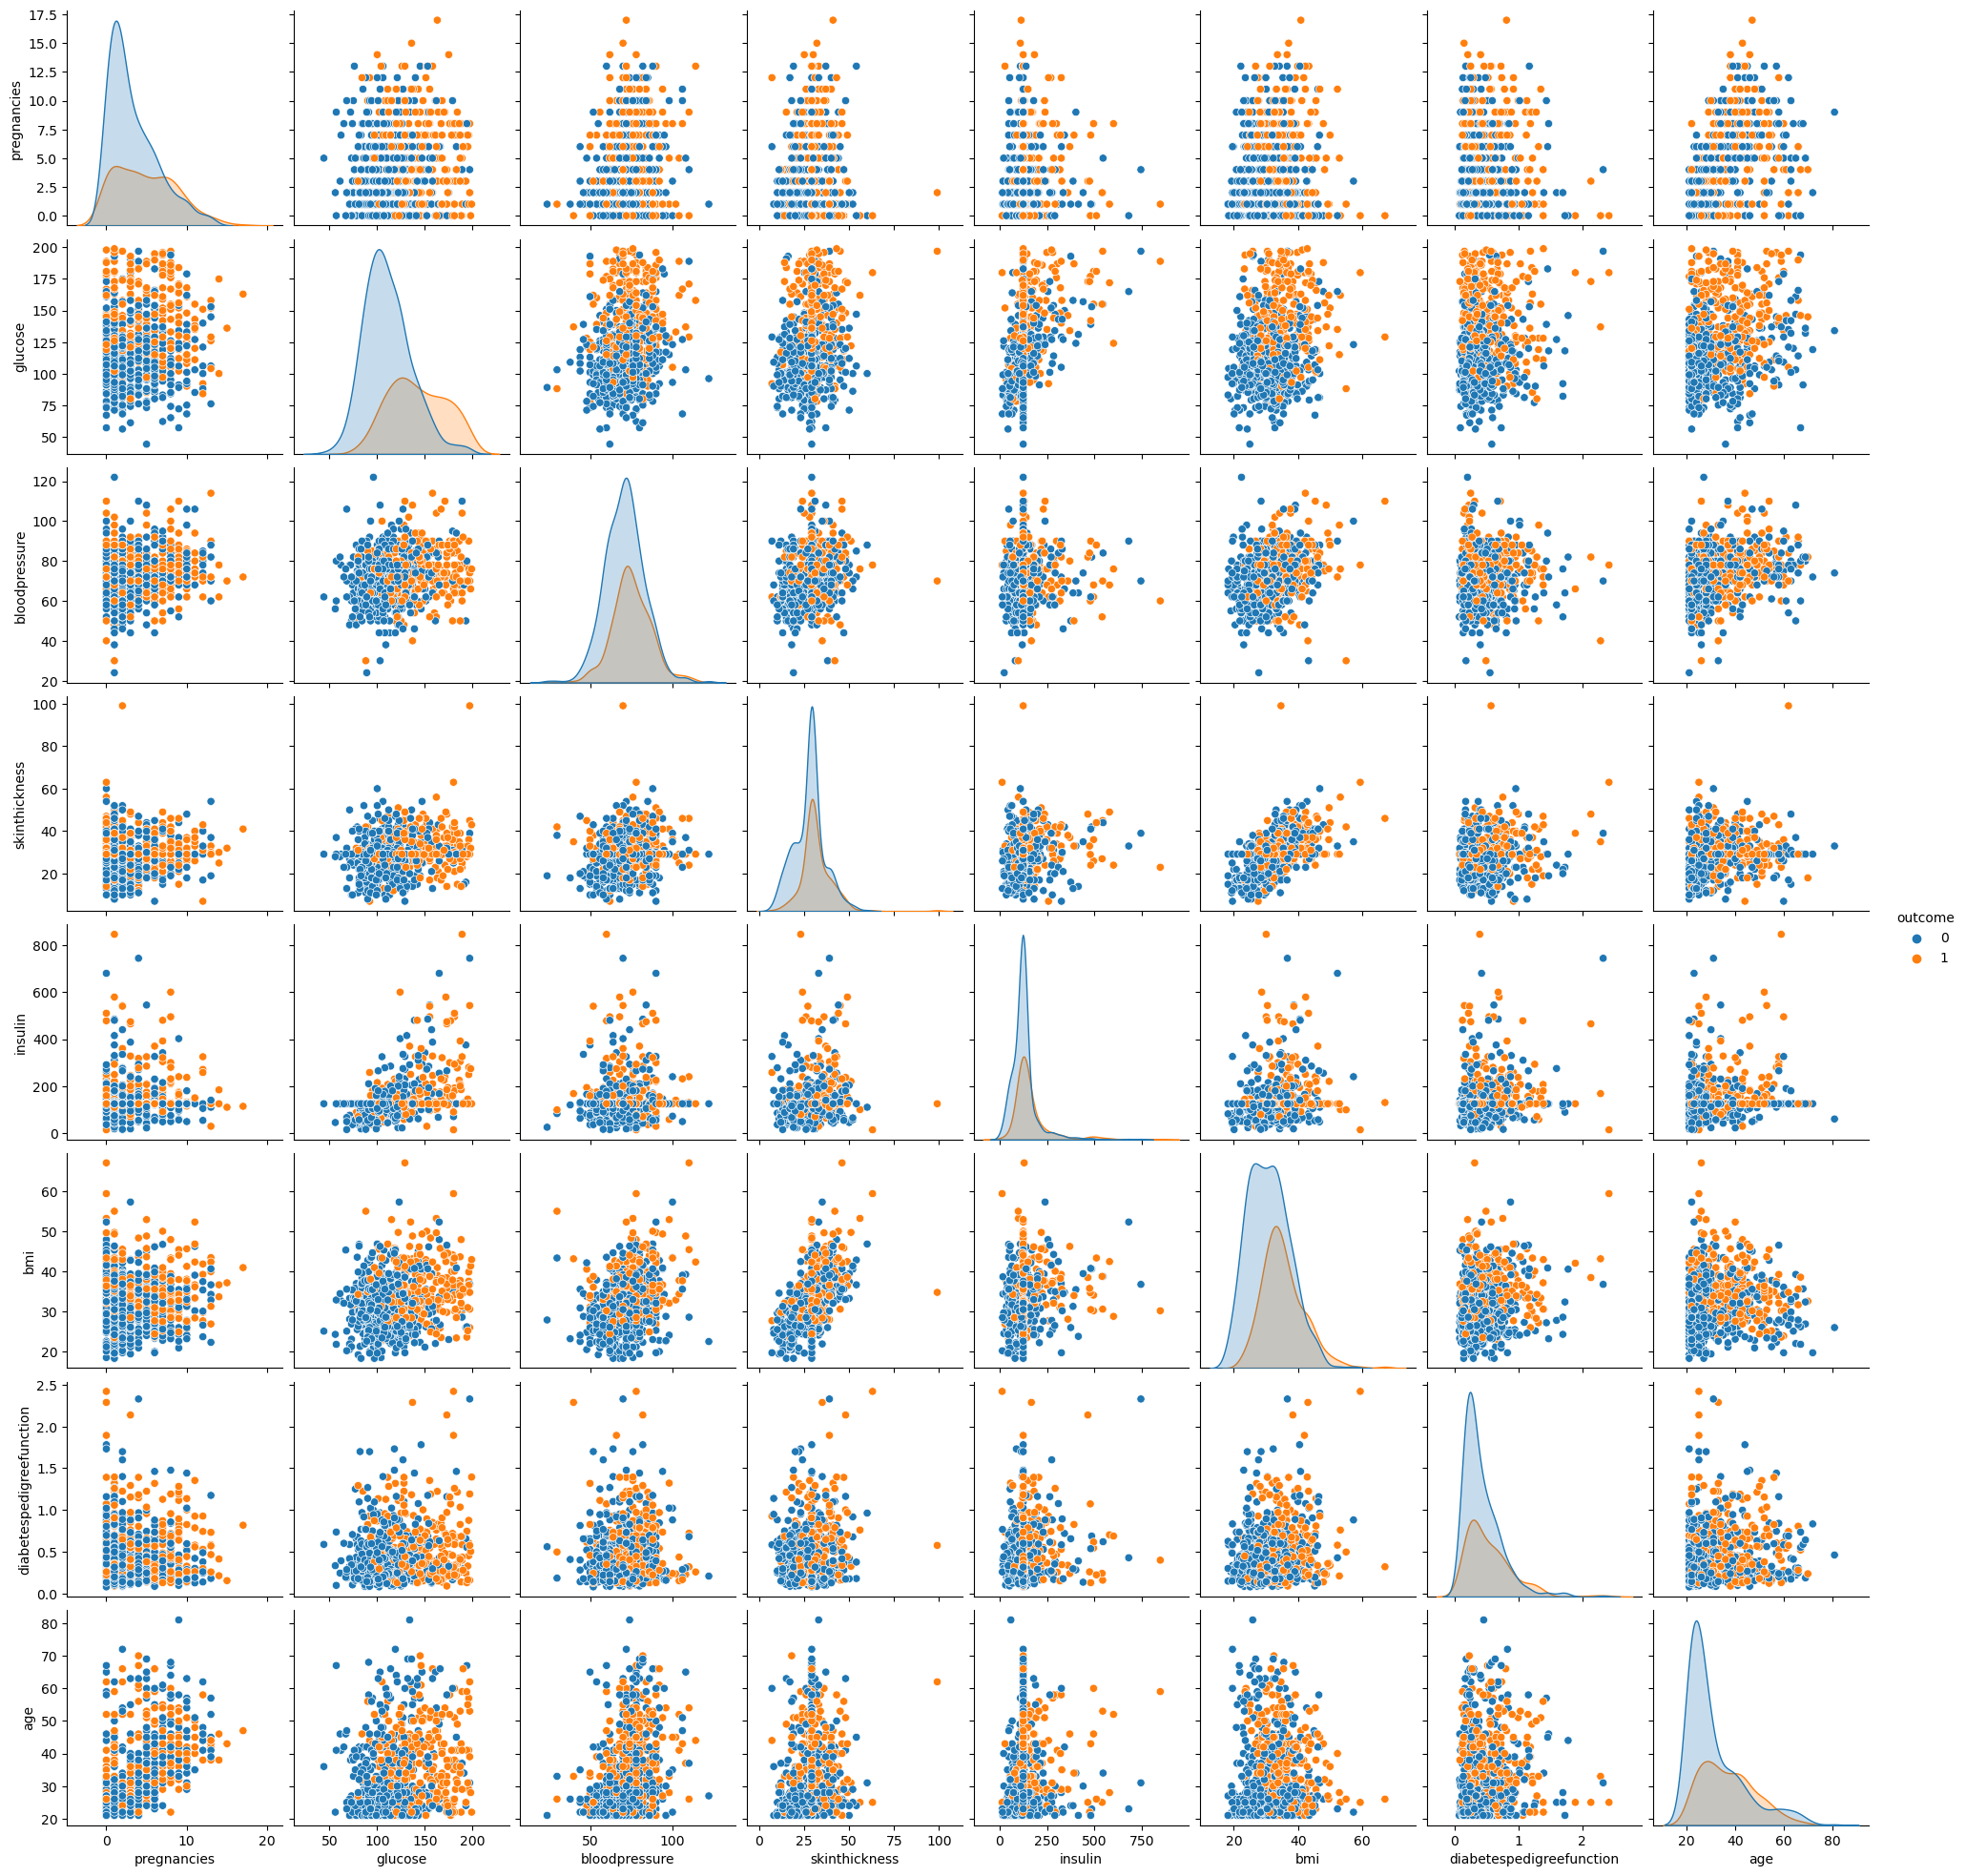

In [16]:
# checking the relationship between the variables
p = sns.pairplot(diabetes, hue = 'outcome')

Text(0.5, 1.0, 'Correlation Matrix')

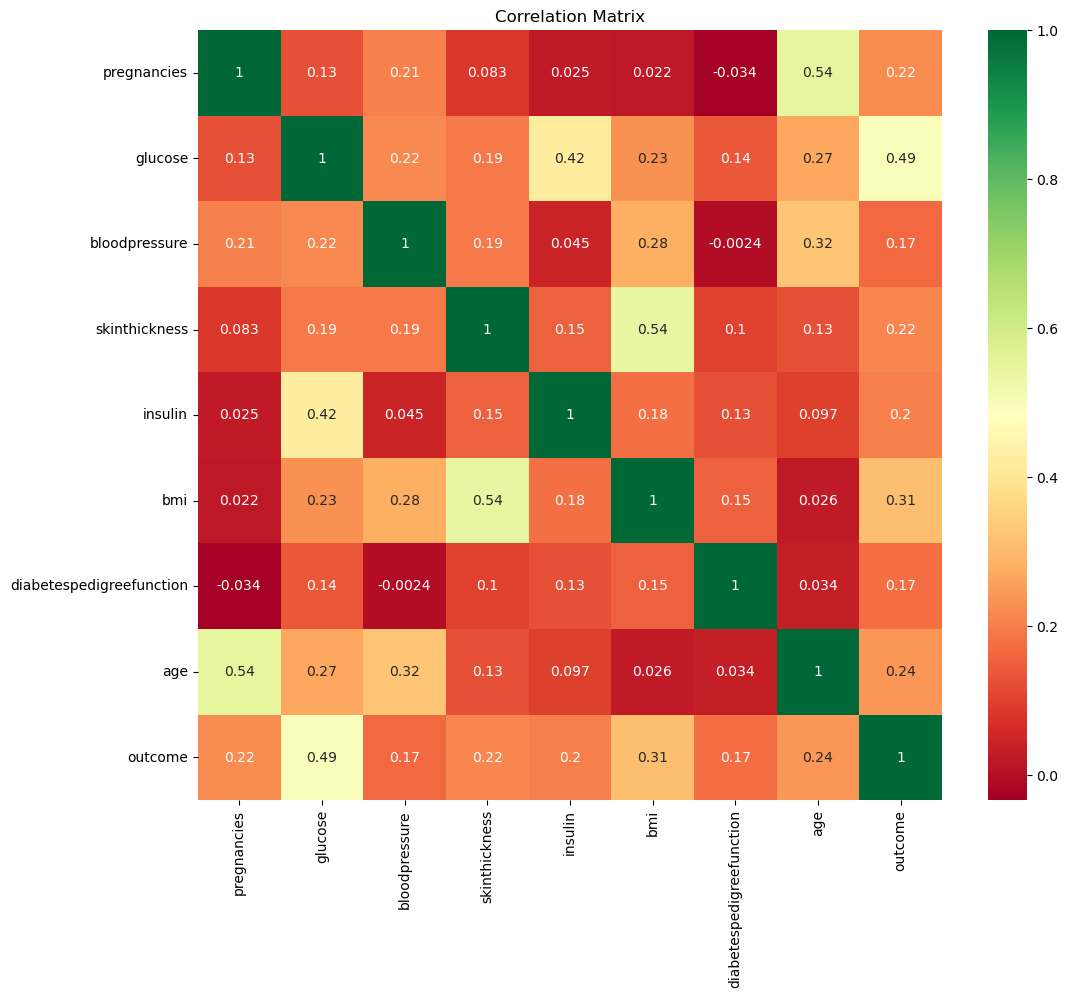

In [17]:
# correlation between the features

plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Matrix")

### Scaling the data using Standard scaler

In [18]:
# getting our features
X_raw = diabetes.drop('outcome', axis = 1) 

# scaling our feateures using standard scaler
std = StandardScaler()
X_scaled = std.fit_transform(X_raw)

## Building our Machine Learning Model

In [19]:
# splitting our data into features and target variables
X = X_scaled #features
y = diabetes['outcome'] #target

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, stratify = y)


### Random Forest 

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


#making predictions
y_predtest = rf.predict(X_test)
y_predtrain = rf.predict(X_train)

In [21]:
# Evaluating our model
print("Test accuracy = ", accuracy_score(y_test, y_predtest))
print("Train accuracy = ", accuracy_score(y_train, y_predtrain))
print('\nROC_AUC Score', roc_auc_score(y_test, y_predtest))

print('\nclassification_report', classification_report(y_test, y_predtest))


Test accuracy =  0.7532467532467533
Train accuracy =  1.0

ROC_AUC Score 0.7290740740740742

classification_report               precision    recall  f1-score   support

           0       0.81      0.81      0.81       100
           1       0.65      0.65      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



<Axes: >

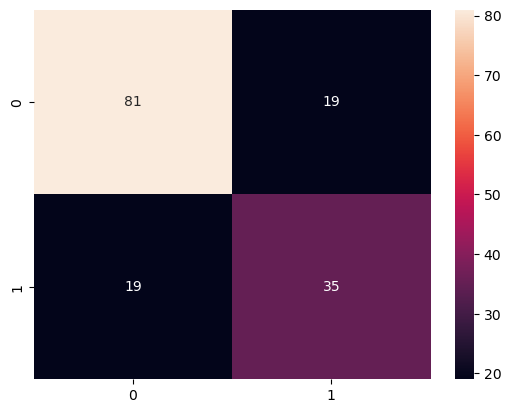

In [22]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predtest), annot=True)

### KNearest Neighbors

In [23]:
test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [24]:
# To get the maximum train score and the corresponding value of k

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [25]:
# To get the maximum test score and the corresponding value of k

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.32467532467533 % and k = [5, 8]


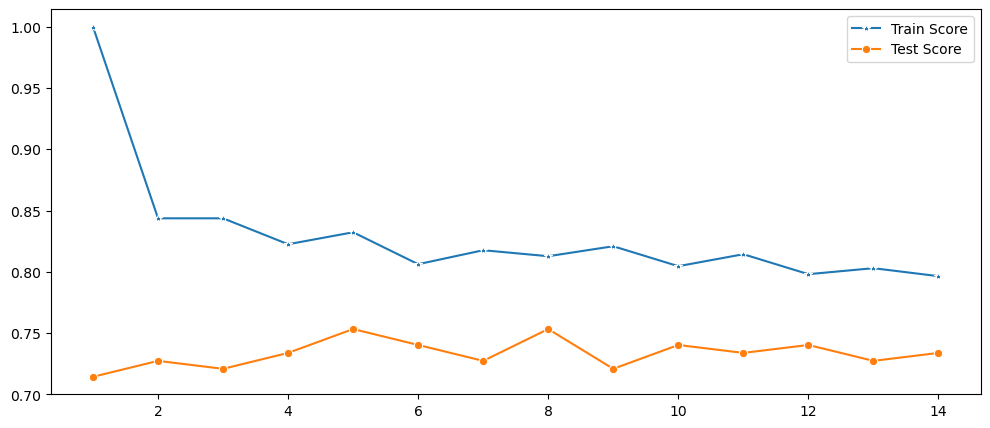

In [26]:
# Creating a plot to check the best training and testing scores

plt.figure(figsize = (12,5))
p = sns.lineplot(x=range(1,15), y=train_scores, marker = '*', label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores, marker = 'o', label='Test Score')

The best result is at k = 8 and will be used to build the model

In [27]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7532467532467533

In [28]:
# making predictions

y_predtest = knn.predict(X_test)
y_predtrain = knn.predict(X_train)

<Axes: >

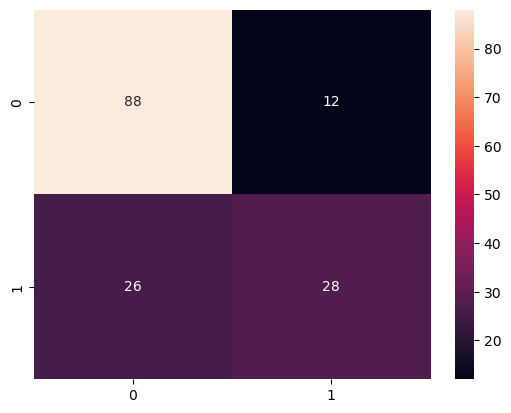

In [29]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predtest), annot=True)

### Hyperparameter Tuning using GridsearchCV

In [30]:
# defining my parameter
param_grid = {'n_neighbors':range(1,50)}
knn = KNeighborsClassifier()

Gridsearch = GridSearchCV(knn, param_grid, cv=5)
Gridsearch.fit(X_train, y_train)

print('Best Score:', (Gridsearch.best_score_))
print('Best Parameter:', (Gridsearch.best_params_))

Best Score: 0.7801679328268692
Best Parameter: {'n_neighbors': 15}


In [31]:
# when k =27
knn = KNeighborsClassifier(15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [32]:
# making predictions
y_predtest = knn.predict(X_test)
y_predtrain = knn.predict(X_train)

In [33]:
# Evaluating our model
print('\nROC_AUC Score', roc_auc_score(y_test, y_predtest))

print('\nclassification_report', classification_report(y_test, y_predtest))


ROC_AUC Score 0.6935185185185185

classification_report               precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.66      0.54      0.59        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



<Axes: >

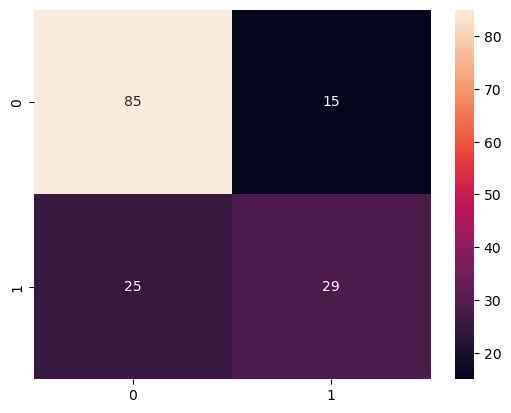

In [34]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predtest), annot=True)